In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:

def rastrigin_function(x, A=10):
    p = len(x)
    return A * p + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

In [14]:
def initialize_population(pop_size, chromosome_length):
    return np.random.randint(2, size=(pop_size, chromosome_length))

In [15]:
def decode_chromosome(chromosome, num_dimensions, bits_per_dimension, domain=(-10, 10)):
    split = np.split(chromosome, num_dimensions)
    real_values = []
    for bit_array in split:
        decimal_value = int("".join(str(bit) for bit in bit_array), 2)
        min_domain, max_domain = domain
        real_value = min_domain + ((max_domain - min_domain) / ((2**bits_per_dimension) - 1)) * decimal_value
        real_values.append(real_value)
    return real_values

In [16]:
def roulette_wheel_selection(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    selection_probabilities = [fitness / total_fitness for fitness in fitness_scores]
    return population[np.random.choice(len(population), p=selection_probabilities)]

In [17]:
def two_point_crossover(parent1, parent2):
    size = len(parent1)
    crossover_point1, crossover_point2 = sorted(np.random.choice(range(1, size), 2, replace=False))
    offspring1 = np.concatenate([parent1[:crossover_point1], parent2[crossover_point1:crossover_point2], parent1[crossover_point2:]])
    offspring2 = np.concatenate([parent2[:crossover_point1], parent1[crossover_point1:crossover_point2], parent2[crossover_point2:]])
    return offspring1, offspring2

In [18]:
def mutate(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]  
    return chromosome

In [19]:
def genetic_algorithm(pop_size, chromosome_length, num_dimensions, bits_per_dimension, num_generations, mutation_rate):
    population = initialize_population(pop_size, chromosome_length)
    best_solution = None
    best_fitness = float('inf')
    generation_data = []
    
    for generation in range(num_generations):
        decoded_population = [decode_chromosome(chromo, num_dimensions, bits_per_dimension) for chromo in population]
        fitness_scores = [rastrigin_function(individual) for individual in decoded_population]
        
        current_best_fitness = min(fitness_scores)
        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_solution = decoded_population[fitness_scores.index(best_fitness)]
        
        new_population = []
        for _ in range(pop_size // 2):
            parent1 = roulette_wheel_selection(population, fitness_scores)
            parent2 = roulette_wheel_selection(population, fitness_scores)
            offspring1, offspring2 = two_point_crossover(parent1, parent2)
            new_population.extend([offspring1, offspring2])
        
        min_fitness = min(fitness_scores)
        max_fitness = max(fitness_scores)
        mean_fitness = np.mean(fitness_scores)
        
        generation_data.append({
            "Generation": generation,
            "Min Fitness": min_fitness,
            "Max Fitness": max_fitness,
            "Mean Fitness": mean_fitness,
        })
        
        population = [mutate(offspring, mutation_rate) for offspring in new_population]
    
    df = pd.DataFrame(generation_data)
    df.to_csv("generation_data.csv", index=False)
    
    return best_solution, best_fitness, df

            Min Fitness  Max Fitness  Mean Fitness  Std Fitness
Generation                                                     
0            498.954784  1282.932327    867.697102          NaN
1            528.559690  1238.773584    906.224302          NaN
2            663.503394  1287.668159    914.408874          NaN
3            550.817842  1276.535246    940.972810          NaN
4            590.447431  1213.884260    920.262647          NaN
...                 ...          ...           ...          ...
95           857.940710  1647.568711   1193.014580          NaN
96           894.126115  1567.039929   1197.220131          NaN
97           921.506220  1452.587683   1210.829663          NaN
98           890.829572  1504.470452   1214.786955          NaN
99           796.193835  1593.884275   1218.850766          NaN

[100 rows x 4 columns]


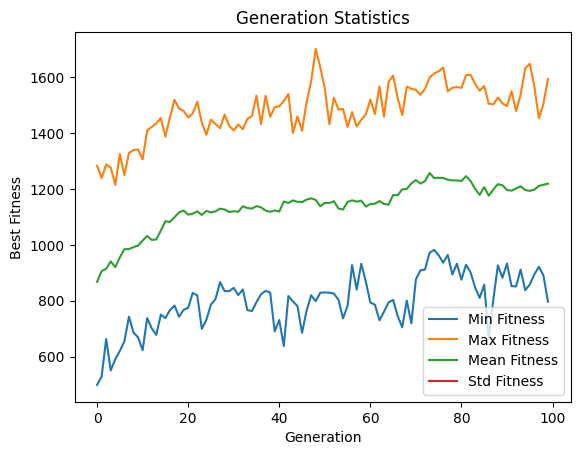

In [20]:
best_solution, best_fitness, df = genetic_algorithm(
    pop_size=100, chromosome_length=200, num_dimensions=20, bits_per_dimension=10,
    num_generations=100, mutation_rate=0.01
)

stats_df = df.groupby('Generation').agg({
    'Min Fitness': 'min',
    'Max Fitness': 'max',
    'Mean Fitness': 'mean'
})

stats_df['Std Fitness'] = df.groupby('Generation')['Mean Fitness'].transform('std')

print(stats_df)

stats_df.plot(kind='line')
plt.title('Generation Statistics')
plt.ylabel('Best Fitness')
plt.show()